## Goal of the notebook

In this notebook I will be using countvectorized dataframe, then I will be selecting 100 top features by SelectKBest( ) and use them further to model. I will be running two models here:

- RandomForestClassifier( )
- LogisticRegression( )


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            confusion_matrix, 
                            classification_report,ConfusionMatrixDisplay,
                            plot_confusion_matrix)

from sklearn.linear_model import LogisticRegression 


np.random.seed(73) #to maintain consistency in reproducibility of same numbers across


In [3]:
df=pd.read_csv('../data/Vectorised_Data.csv')#importing vectorised dataframe 
df.head()

,is_sarcastic,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,mean_word_len,abort,abus,accept,...,CCONJ_proportion,NUM_proportion,PUNCT_proportion,X_proportion,AUX_proportion,ADV_proportion,VERB_proportion,PART_proportion,PROPN_proportion,NOUN_proportion
0,0.0,12.0,12.0,78.0,2.0,2.0,5.583333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.100000,0.0,0.000000,0.500000
1,0.0,14.0,14.0,84.0,6.0,3.0,5.071429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125,0.000000,0.0,0.625000,0.125000
2,1.0,14.0,13.0,79.0,4.0,1.0,4.714286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.222222,0.0,0.333333,0.333333
3,1.0,13.0,13.0,84.0,5.0,2.0,5.538462,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.333333,0.0,0.111111,0.444444
4,0.0,11.0,11.0,64.0,3.0,2.0,4.909091,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.142857,0.0,0.428571,0.428571


In [4]:
df.shape# shape of the data

(26147, 1023)

In [5]:
#checking for nulls
df.isnull().sum()

is_sarcastic        0
num_words           0
num_unique_words    0
num_chars           0
num_stopwords       0
                   ..
ADV_proportion      0
VERB_proportion     0
PART_proportion     0
PROPN_proportion    0
NOUN_proportion     0
Length: 1023, dtype: int64

In [6]:
#dropping any nulls
df.dropna(inplace=True)

## train test split

In [7]:
#defining X and y variables
y = df.is_sarcastic
X = df[[cols for cols in df.columns if cols != "is_sarcastic"]]

In [8]:
#stratification as dataframe was not balanced
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.20,stratify=y)


## Standard Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# initialize
ss = StandardScaler()

# fit on Train
X_train_ss = pd.DataFrame(ss.fit_transform(X_train),
                          columns = X_train.columns,
                          index = X_train.index)

# transform test
X_test_ss = pd.DataFrame(ss.transform(X_test),
                         columns = X_test.columns,
                         index = X_test.index)

## Select KBest

In [11]:
from sklearn.feature_selection import SelectKBest

In [12]:
selector = SelectKBest(k=100)
selector.fit(X_train_ss, y_train)

SelectKBest(k=100)

In [13]:
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

In [14]:
#X_train_feat_select->train df created from selected features 
#X_test_feat_select->test df created from selected features 
X_train_feat_select = X_train_ss.iloc[:,cols]
X_test_feat_select = X_test_ss.iloc[:,cols]

In [15]:
#removed_cols-> columns removed after SelectKBest( )
#X_train_feat_removed-> df created from X_train containing columns removed after SelectKBest( )
#X_test_feat_removed->df created from X_test containing columns removed after SelectKBest( )
removed_cols = [c for c in X_train_ss.columns if c not in X_train_feat_select.columns]
X_train_feat_removed = X_train_ss.loc[:,removed_cols]
X_test_feat_removed = X_test_ss.loc[:,removed_cols]

In [16]:
# Selected Columns
X_train_feat_select.columns

Index(['num_words', 'num_unique_words', 'num_chars', 'num_stopwords',
       'num_punctuations', 'mean_word_len', 'air', 'airport', 'alreadi',
       'apart', 'ball', 'bar', 'break', 'car', 'career', 'challeng', 'chang',
       'comment', 'continu', 'cool', 'crash', 'dress', 'drink', 'driver',
       'drunk', 'expect', 'face', 'father', 'fear', 'final', 'generat',
       'girlfriend', 'governor', 'graduat', 'halloween', 'health care',
       'hillari', 'inspir', 'interview', 'jame', 'journalist', 'justic',
       'kill', 'know', 'law', 'lead', 'link', 'littl', 'local', 'loss', 'low',
       'messag', 'non', 'paul ryan', 'pay', 'pop', 'press', 'pretti',
       'problem', 'push', 'race', 'racist', 'recip', 'reform', 'republican',
       'return', 'room', 'ryan', 'sad', 'scienc', 'stori', 'stress', 'sudden',
       'super', 'sure', 'tax', 'taylor', 'teacher', 'terrifi', 'thank',
       'thousand', 'tour', 'treat', 'true', 'truth', 'union', 'updat', 'urg',
       'vacat', 'veteran', 'video

## Models

### Random Forest

In [93]:
def rfscore2(X_train, X_test, y_train, y_test,n_estimators,max_depth):
   
    '''Gridsearching RandomForest'''
   
    y_test= y_test.values.ravel()
    y_train = y_train.values.ravel()
    rf_params = {
             'n_estimators':n_estimators,
             'max_depth':max_depth}   # parameters for grid search
    
    rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, verbose=1, n_jobs=-1)
    rf_gs.fit(X_train,y_train) # training the random forest with all possible parameters
    print('GridSearch results')
    print('The best parameters on the training data are:\n',rf_gs.best_params_) # printing the best parameters
    max_depth_best = rf_gs.best_params_['max_depth']      # getting the best max_depth
    n_estimators_best = rf_gs.best_params_['n_estimators']  # getting the best n_estimators
    print("best max_depth:",max_depth_best)
    print("best n_estimators:",n_estimators_best)
    best_rf_gs = RandomForestClassifier(max_depth=max_depth_best,n_estimators=n_estimators_best) # instantiate the best model
    
    score(best_rf_gs, 'Random Forest', X_train, y_train)
    
    best_rf_gs.fit(X_train,y_train)  # fitting the best model

    preds = best_rf_gs.predict(X_test)
    print("")
    
    disp = confusion_matrix(y_test,preds)
    matrix_display = ConfusionMatrixDisplay(confusion_matrix=disp)
    matrix_display.plot()

    
    print(classification_report(y_test,preds))
    print(accuracy_score(y_test, preds))

    
    print('Features and their importance for Random Forest:\n')
    feature_importances = pd.Series(best_rf_gs.feature_importances_, index=X_train.columns).sort_values().tail(10)
    fig, ax = plt.subplots(figsize=(10, 10))
    print(feature_importances.plot(kind="barh", figsize=(6,6)))
    
    ax.set_ylabel('Features')
    ax.set_xlabel('Coefficients')
    ax.set_title('Random Forest Model',
             fontdict=dict(fontsize=14,
                           fontweight='bold',
                           color='black'),
             pad=10, 
             loc='left', )
    
    max_width = 0
    for rect in ax.patches:
        if rect.get_width()>max_width:
            max_width = rect.get_width()

    for rect in ax.patches:

        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        label_text = round(width, 2)

        label_x = x + width / 2
        label_y = y + height / 2

        if label_x < max_width*.05:
            ax.text(width+.05*max_width, label_y, f'{label_text:.2f}'
                            , ha='center', va='center', color = 'black')
        else:
            ax.text(label_x, label_y, f'{label_text:.2f}'
                            , ha='center', va='center', color = 'white')
    
    return

In [94]:
def score(model, name, X, y):
    '''Cross val score for specific model, df and target'''
    cv = StratifiedKFold(n_splits=10,
                         random_state=42,
                         shuffle=True)
    s = cross_val_score(model, X, y, cv=cv,
                        n_jobs=-1)
    print('{} Score: {:.2f} +- {:.3f}'.format(name, 
                                              s.mean(), 
                                              2 * s.std()))

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
GridSearch results
The best parameters on the training data are:
 {'max_depth': 19, 'n_estimators': 100}
best max_depth: 19
best n_estimators: 100
Random Forest Score: 0.65 +- 0.014

              precision    recall  f1-score   support

         0.0       0.66      0.81      0.72      2969
         1.0       0.64      0.44      0.52      2261

    accuracy                           0.65      5230
   macro avg       0.65      0.63      0.62      5230
weighted avg       0.65      0.65      0.64      5230

0.6502868068833652
Features and their importance for Random Forest:

AxesSubplot(0.125,0.125;0.775x0.755)


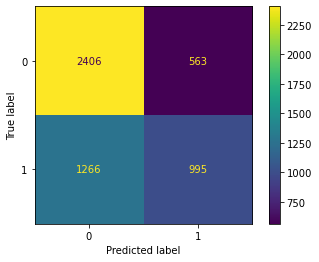

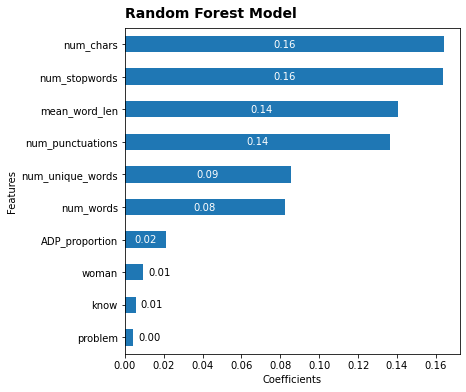

In [96]:
n_estimators = list(range(10,150,10))
max_depth = list(range(1, 30, 2)) 
rfscore2(X_train_feat_select, X_test_feat_select, y_train, y_test,n_estimators,max_depth)

**Observations**:
    
- num_chars, num_stopwords, mean_word_len, num_punctuations are among most relevant features
  with highest values of coefficients.
- The model RandomForestClassifier here is 65% accurate in predicting the target class. 
- This is 9% more accurate than our baseline model with 56% accuracy.
- It was more precise in predicting the "0" class(non-sarcastic), with a precision of 65%.The precision for predicting "1(is_sarcastic)" is 63%.


### Logistic Regression

In [20]:
logreg_params = {'penalty': ['l1', 'l2'], 
                 'solver': ['liblinear', 'saga'],
                }

logreg_gridsearch = GridSearchCV(LogisticRegression(), 
                                 logreg_params, 
                                 cv=5, 
                                 n_jobs=-1)

logreg_gridsearch.fit(X_train_feat_select, y_train.values.ravel())

print(logreg_gridsearch.best_estimator_)
print(logreg_gridsearch.best_params_)

print('\nBaseline: 56%')

print('\nBest Score:', round(logreg_gridsearch.best_score_, 4))
print('Test Score:', round(logreg_gridsearch.score(X_test_feat_select, y_test.values.ravel()), 4))

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:35

LogisticRegression(solver='saga')
{'penalty': 'l2', 'solver': 'saga'}

Baseline: 56%

Best Score: 0.629
Test Score: 0.6241


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [21]:
logreg = LogisticRegression(max_iter=500, 
                            penalty='l2', 
                            solver='saga')

logreg.fit(X_train, y_train.values.ravel())

train_scores = cross_val_score(logreg, X_train_feat_select, y_train.values.ravel())
print('Train scores:', train_scores)
print('Mean:', round(train_scores.mean(), 3))
print('Stdev:', round(2 * train_scores.std(), 3), '\n')


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Baseline: 56%

Train scores: [0.62237094 0.63240918 0.64140569 0.62706192 0.61797753]
Mean: 0.628
Stdev: 0.016 



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [83]:
### Coefficient Interpretation
logreg_coefs_0 = pd.DataFrame(list(zip(X_train_feat_select.columns, np.expm1(logreg.coef_[0]))), 
                           columns=['features', 'coef'])

logreg_coefs_0['abs'] = abs(logreg_coefs_0['coef'])
feat_log = logreg_coefs_0.sort_values('abs', ascending=False).head(10)
feat_log.set_index('features',inplace=True)

Features and their importance for logistic regression:



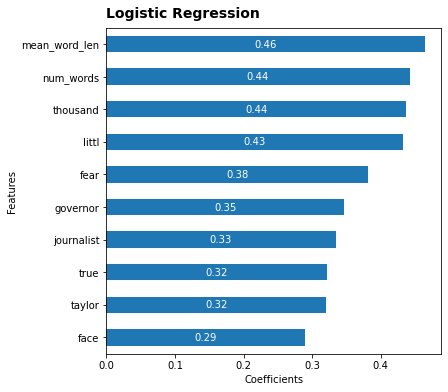

In [92]:
#plotting graph for the top 10 features
print('Features and their importance for logistic regression:\n')
fig, ax = plt.subplots(figsize=(10, 10))
feat_log['abs'].plot(kind="barh", figsize=(6,6))

ax.set_ylabel('Features')
ax.set_xlabel('Coefficients')
ax.set_title('Logistic Regression',
             fontdict=dict(fontsize=14,
                           fontweight='bold',
                           color='black'),
             pad=10, 
             loc='left', )

max_width = 0
for rect in ax.patches:
    if rect.get_width()>max_width:
        max_width = rect.get_width()
    
for rect in ax.patches:

    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
            
    label_text = round(width, 2)
            
    label_x = x + width / 2
    label_y = y + height / 2

    if label_x < max_width*.05:
        ax.text(width+.05*max_width, label_y, f'{label_text:.2f}'
                        , ha='center', va='center', color = 'black')
    else:
        ax.text(label_x, label_y, f'{label_text:.2f}'
                        , ha='center', va='center', color = 'white')
            
plt.gca().invert_yaxis()

               precision    recall  f1-score   support

not_sarcastic       0.65      0.74      0.69      2969
 is_sarcastic       0.58      0.47      0.52      2261

     accuracy                           0.63      5230
    macro avg       0.62      0.61      0.61      5230
 weighted avg       0.62      0.63      0.62      5230



''

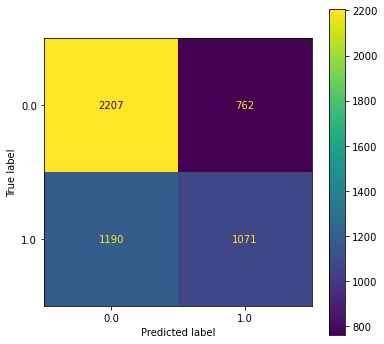

In [65]:
conmat = np.array(confusion_matrix(y_test, 
                                   logreg.predict(X_test), 
                                   labels=[0, 1]))

print(classification_report(y_test,
                            logreg.predict(X_test), 
                            target_names=['not_sarcastic', 'is_sarcastic']))

matrix_display = ConfusionMatrixDisplay(confusion_matrix=conmat, 
                                        display_labels=logreg.classes_)
matrix_display.plot()

figure = plt.gcf()
figure.set_size_inches(6, 6)
;

**Observations**:
    
- This logistic regression model was 62.8% accurate in predicting the  target class. This is 6.8% more accurate than our baseline model with 56% probability.
- num_punctuations,NOUN_proportion, num_stopwords are among most relevant features with highest values of coefficients.
- The best solver for logistic regression model here is 'saga'
- It was most precise in predicting 'not_sarcastic' class with a precision of 65%. The precision for predicting 'is_sarcastic' is 58%.


## Conclusion for this notebook :

- RandomForest performed better than Logistic regression in terms of accuracy
- The models are not really able to capture the context of the text, no bigrams or trigrams are coming as really relevant which leads to low accuracy scores since sarcasm detection is very subjective.

## Way Forward

- I want to see whether particular linear combinations of certain words do well 
  for detecting sarcasm or not. For that I want to try PCA on all columns, and use   the resulting dataframe to model again. 